<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-processing-Dataset" data-toc-modified-id="Pre-processing-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-processing Dataset</a></span><ul class="toc-item"><li><span><a href="#Check-the-frequency" data-toc-modified-id="Check-the-frequency-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Check the frequency</a></span></li><li><span><a href="#Save-as-different-table" data-toc-modified-id="Save-as-different-table-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Save as different table</a></span></li><li><span><a href="#Tansfer-to-shapefile" data-toc-modified-id="Tansfer-to-shapefile-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tansfer to shapefile</a></span></li></ul></li><li><span><a href="#Cluster-Analysis" data-toc-modified-id="Cluster-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cluster Analysis</a></span><ul class="toc-item"><li><span><a href="#Read-the-Zillow-neighbors" data-toc-modified-id="Read-the-Zillow-neighbors-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read the Zillow neighbors</a></span></li></ul></li></ul></div>

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 12]

In [2]:
import sys
sys.path.append('Script')
import functions

In [3]:
df = pd.read_excel('Classified_events.xlsx')
df = functions.drop_na(df)
df.head()

,Category,Group,Name,POI,Place,URL,Host By,Address,Description,Key Words,...,Lat,Long,Date,Start_Time,End_Time,Location,Types,start_timeRange,end_timeRange,weekdays
0,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 9, 2020, 7:00 PM: Hi Friends,New Clas...","Musicians,Artists,Performing Arts,Models,Songw...",...,32.850033,-97.144920,2020-03-09,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0
1,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 16, 2020, 7:00 PM: Hi Friends,New Cla...","Musicians,Artists,Performing Arts,Models,Songw...",...,32.850033,-97.144920,2020-03-16,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0
2,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 23, 2020, 7:00 PM: Hi Friends,New Cla...","Musicians,Artists,Performing Arts,Models,Songw...",...,32.850033,-97.144920,2020-03-23,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0
3,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 30, 2020, 7:00 PM: Hi Friends,New Cla...","Musicians,Artists,Performing Arts,Models,Songw...",...,32.850033,-97.144920,2020-03-30,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0
4,Arts,ArtSpace at Metropolitan Press,Metropolitan Press ArtSpace March Reception: Y...,ArtSpace Metropolitan Press,"1250 Majesty Drive · Dallas, TX",https://www.meetup.com/ArtSpace-at-Metropolita...,Karen T.,"Dallas, TX, us","Thu, Mar 5, 2020, 5:00 PM: Metropolitan’s Marc...","Photography,Art,Group Art,Creative Circle,Fine...",...,32.826092,-96.876396,2020-03-05,5:00 PM,8:00 PM,32.82609176635742;-96.87639617919922,One Time events,34,40,3


## Pre-processing Dataset

### Check the frequency

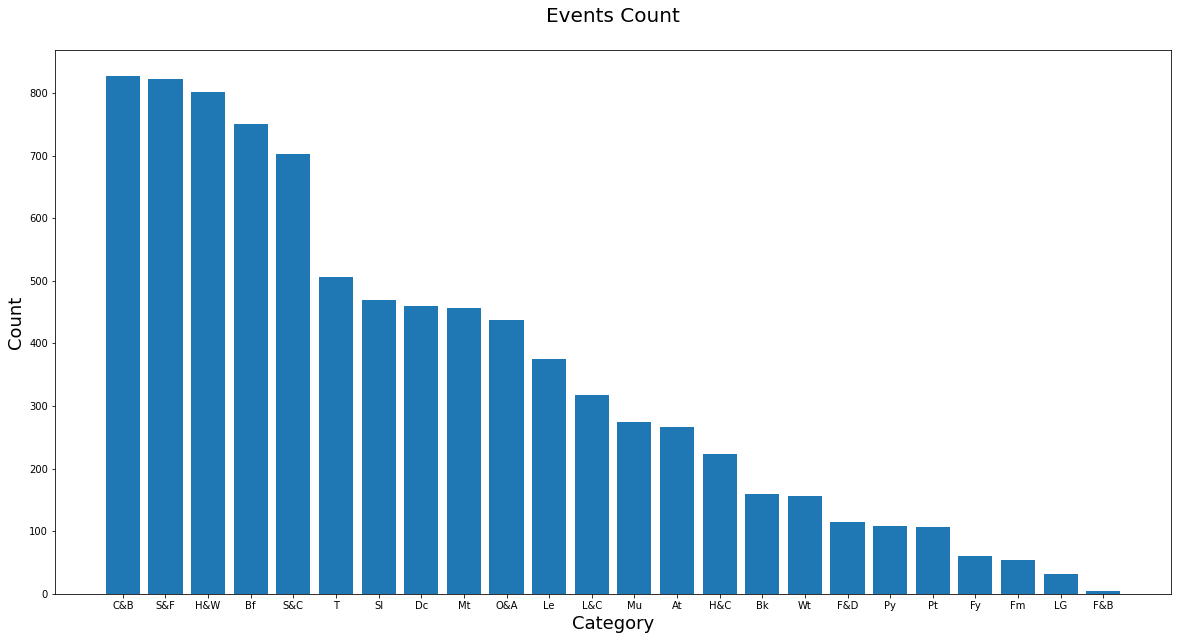

In [4]:
df1 = df.replace(['Arts', 'Beliefs', 'Book Clubs', 'Career & Business', 'Dance',
       'Family', 'Fashion & Beauty', 'Film', 'Food & Drink',
       'Health & Wellness', 'Hobbies & Crafts', 'Language & Culture',
       'Learning', 'LGBTQ', 'Movements', 'Music', 'Outdoors & Adventure',
       'Pets', 'Photography', 'Sci-Fi & Games', 'Social',
       'Sports & Fitness', 'Tech', 'Writing'],['At','Bf','Bk','C&B','Dc','Fy','F&B','Fm','F&D','H&W','H&C','L&C',
                                              'Le','LG','Mt','Mu','O&A','Pt','Py','S&C','Sl','S&F','T','Wt'])

plt.figure(figsize=(20, 10))
plt.bar(df1['Category'].value_counts().index,df1['Category'].value_counts())
plt.title('Events Count\n', fontsize=20)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.show()

### Save as different table

In [5]:
import os
import datetime
output_path = '../Data/Social-Events'

In [6]:
cate_lst = list(set(df['Category']))

# cate_lst = [str(a).replace(' ','') for a in cate_lst]
# print(cate_lst)

for item in cate_lst:
    df_item = df.loc[df['Category'] == item]
    file_name = os.path.join(output_path ,str(item) + '.xlsx')
    print(file_name)
    df_item.to_excel(file_name,index= False)

../Data/Social-Events\Health & Wellness.xlsx
../Data/Social-Events\Book Clubs.xlsx
../Data/Social-Events\LGBTQ.xlsx
../Data/Social-Events\Language & Culture.xlsx
../Data/Social-Events\Career & Business.xlsx
../Data/Social-Events\Pets.xlsx
../Data/Social-Events\Fashion & Beauty.xlsx
../Data/Social-Events\Beliefs.xlsx
../Data/Social-Events\Sports & Fitness.xlsx
../Data/Social-Events\Food & Drink.xlsx
../Data/Social-Events\Sci-Fi & Games.xlsx
../Data/Social-Events\Learning.xlsx
../Data/Social-Events\Arts.xlsx
../Data/Social-Events\Photography.xlsx
../Data/Social-Events\Film.xlsx
../Data/Social-Events\Social.xlsx
../Data/Social-Events\Writing.xlsx
../Data/Social-Events\Music.xlsx
../Data/Social-Events\Tech.xlsx
../Data/Social-Events\Movements.xlsx
../Data/Social-Events\Hobbies & Crafts.xlsx
../Data/Social-Events\Outdoors & Adventure.xlsx
../Data/Social-Events\Family.xlsx
../Data/Social-Events\Dance.xlsx


### Tansfer to shapefile

In [7]:
excel_lst = functions.list_file(output_path,extension='xlsx')
excel_lst

['../Data/Social-Events\\Arts.xlsx',
 '../Data/Social-Events\\Beliefs.xlsx',
 '../Data/Social-Events\\Book Clubs.xlsx',
 '../Data/Social-Events\\Career & Business.xlsx',
 '../Data/Social-Events\\Dance.xlsx',
 '../Data/Social-Events\\Family.xlsx',
 '../Data/Social-Events\\Fashion & Beauty.xlsx',
 '../Data/Social-Events\\Film.xlsx',
 '../Data/Social-Events\\Food & Drink.xlsx',
 '../Data/Social-Events\\Health & Wellness.xlsx',
 '../Data/Social-Events\\Hobbies & Crafts.xlsx',
 '../Data/Social-Events\\Language & Culture.xlsx',
 '../Data/Social-Events\\Learning.xlsx',
 '../Data/Social-Events\\LGBTQ.xlsx',
 '../Data/Social-Events\\Movements.xlsx',
 '../Data/Social-Events\\Music.xlsx',
 '../Data/Social-Events\\Outdoors & Adventure.xlsx',
 '../Data/Social-Events\\Pets.xlsx',
 '../Data/Social-Events\\Photography.xlsx',
 '../Data/Social-Events\\Sci-Fi & Games.xlsx',
 '../Data/Social-Events\\Social.xlsx',
 '../Data/Social-Events\\Sports & Fitness.xlsx',
 '../Data/Social-Events\\Tech.xlsx',
 '../Da

In [8]:
shp_out_path = '../Shapefile/Social-Events'
functions.to_shp(excel_lst,shp_out_path,Date_format ='%Y-%m-%d',type = 'xlsx',key_x='Long',key_y='Lat')

E:\Anaconda\envs\gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Transfer ../Shapefile/Social-Events\Arts.shp successful!
Transfer ../Shapefile/Social-Events\Beliefs.shp successful!
Transfer ../Shapefile/Social-Events\Book Clubs.shp successful!
Transfer ../Shapefile/Social-Events\Career & Business.shp successful!
Transfer ../Shapefile/Social-Events\Dance.shp successful!
Transfer ../Shapefile/Social-Events\Family.shp successful!
Transfer ../Shapefile/Social-Events\Fashion & Beauty.shp successful!
Transfer ../Shapefile/Social-Events\Film.shp successful!
Transfer ../Shapefile/Social-Events\Food & Drink.shp successful!
Transfer ../Shapefile/Social-Events\Health & Wellness.shp successful!
Transfer ../Shapefile/Social-Events\Hobbies & Crafts.shp successful!
Transfer ../Shapefile/Social-Events\Language & Culture.shp successful!
Transfer ../Shapefile/Social-Events\Learning.shp successful!
Transfer ../Shapefile/Social-Events\LGBTQ.shp successful!
Transfer ../Shapefile/Social-Events\Movements.shp successful!
Transfer ../Shapefile/Social-Events\Music.shp succe

In [10]:
functions.to_shp(['./Classified_events.xlsx'],shp_out_path,Date_format ='%Y-%m-%d',type = 'xlsx',key_x='Long',key_y='Lat')

Transfer ../Shapefile/Social-Events\Classified_events.shp successful!
Transformation finished with 4.67 Seconds


## Cluster Analysis

In [16]:
import glob
import folium

In [19]:
shp_out_path = '../Shapefile/Social-Events'
shp_lst = glob.glob(shp_out_path + '/*.shp')
shp_lst

['../Shapefile/Social-Events\\Arts.shp',
 '../Shapefile/Social-Events\\Beliefs.shp',
 '../Shapefile/Social-Events\\Book Clubs.shp',
 '../Shapefile/Social-Events\\Career & Business.shp',
 '../Shapefile/Social-Events\\Classified_events.shp',
 '../Shapefile/Social-Events\\Dance.shp',
 '../Shapefile/Social-Events\\Family.shp',
 '../Shapefile/Social-Events\\Fashion & Beauty.shp',
 '../Shapefile/Social-Events\\Film.shp',
 '../Shapefile/Social-Events\\Food & Drink.shp',
 '../Shapefile/Social-Events\\Health & Wellness.shp',
 '../Shapefile/Social-Events\\Hobbies & Crafts.shp',
 '../Shapefile/Social-Events\\Language & Culture.shp',
 '../Shapefile/Social-Events\\Learning.shp',
 '../Shapefile/Social-Events\\LGBTQ.shp',
 '../Shapefile/Social-Events\\Movements.shp',
 '../Shapefile/Social-Events\\Music.shp',
 '../Shapefile/Social-Events\\Outdoors & Adventure.shp',
 '../Shapefile/Social-Events\\Pets.shp',
 '../Shapefile/Social-Events\\Photography.shp',
 '../Shapefile/Social-Events\\Sci-Fi & Games.shp'

In [25]:
gdf = gpd.read_file(shp_lst[4])
gdf.head()

,Unnamed_ 0,Category,Group,Name,POI,Place,URL,Host By,Address,Descriptio,...,Long,Date,Start_Time,End_Time,Location,Types,start_ti_1,end_timeRa,weekdays,geometry
0,0,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 9, 2020, 7:00 PM: Hi Friends,New Clas...",...,-97.144920,2020-03-09,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
1,1,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 16, 2020, 7:00 PM: Hi Friends,New Cla...",...,-97.144920,2020-03-16,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
2,2,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 23, 2020, 7:00 PM: Hi Friends,New Cla...",...,-97.144920,2020-03-23,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
3,3,Arts,Art With Intention,Beginners Salsa /Bachata Classes!,2801 Forest Ridge Dr,"2801 Forest Ridge Dr · Bedford, TX",https://www.meetup.com/stepup/events/msdlnrybc...,Kane (My Salsa Dance S.,"Bedford, TX, us","Mon, Mar 30, 2020, 7:00 PM: Hi Friends,New Cla...",...,-97.144920,2020-03-30,7:00 PM,9:00 PM,32.850032806396484;-97.1449203491211,Weekly events,38,42,0,POINT (268149.806 -1344010.431)
4,4,Arts,ArtSpace at Metropolitan Press,Metropolitan Press ArtSpace March Reception: Y...,ArtSpace Metropolitan Press,"1250 Majesty Drive · Dallas, TX",https://www.meetup.com/ArtSpace-at-Metropolita...,Karen T.,"Dallas, TX, us","Thu, Mar 5, 2020, 5:00 PM: Metropolitan?s Marc...",...,-96.876396,2020-03-05,5:00 PM,8:00 PM,32.82609176635742;-96.87639617919922,One Time events,34,40,3,POINT (293442.197 -1345775.544)


In [41]:
print(gdf.shape)
print(df.shape)

(8487, 26)
(8487, 24)


In [42]:
df.loc[0]

Category                                                        Arts
Group                                             Art With Intention
Name                               Beginners Salsa /Bachata Classes!
POI                                             2801 Forest Ridge Dr
Place                             2801 Forest Ridge Dr · Bedford, TX
URL                https://www.meetup.com/stepup/events/msdlnrybc...
Host By                                      Kane (My Salsa Dance S.
Address                                              Bedford, TX, us
Description        Mon, Mar 9, 2020, 7:00 PM: Hi Friends,New Clas...
Key Words          Musicians,Artists,Performing Arts,Models,Songw...
Hold Date                    Monday, March 9, 20207:00 PM to 9:00 PM
Cover_Photo        https://secure.meetupstatic.com/photos/event/c...
Google Map         https://www.google.com/maps/search/?api=1&quer...
Detail             Hi Friends,\nNew Class Schedule!\nMONDAYS:\nBe...
Lat                               

### Read the Zillow neighbors

In [30]:
zillow_neighbors = '../Shapefile/Zillow/Dallas_Neighborhoods.shp'
zillow_gdf = gpd.read_file(zillow_neighbors)
print('Zillow_neighbors', zillow_gdf.crs)
print('Social-Events', gdf.crs)

Zillow_neighbors epsg:4326
Social-Events epsg:2163


**Transfer Projection**

In [31]:
zillow_gdf = zillow_gdf.to_crs(epsg=2163)
print('Zillow_neighbors', zillow_gdf.crs)
print('Social-Events', gdf.crs)

Zillow_neighbors epsg:2163
Social-Events epsg:2163


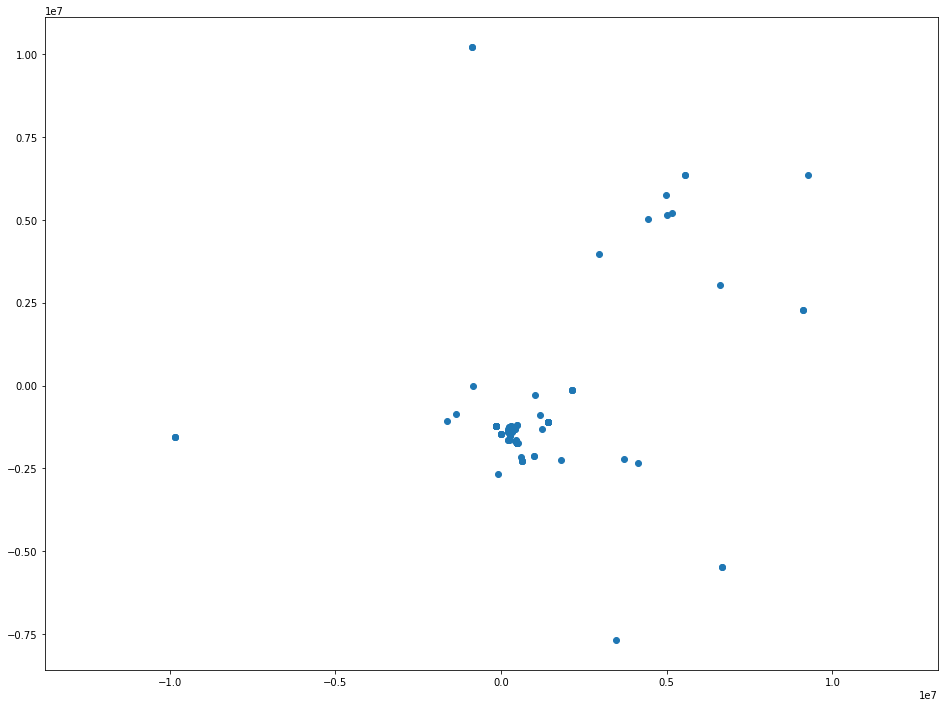

In [34]:
fig, ax = plt.subplots(figsize=(16, 12))
zillow_gdf.plot(cmap='Greys',edgecolor="black",ax=ax,alpha=.5)
gdf.plot(label = 'Category',ax=ax)
plt.axis('equal')
plt.show()